<a href="https://colab.research.google.com/github/Uros-Males/Minimization_Problem_On_Identical_Machines_Analysis/blob/main/CPLEXStatus_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#IN PROGRESS....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import time
import keras

df = pd.read_csv('/content/sample_data/C-instances-runtime-analysis.csv')
#df = df[df['n/m']!=2]
print(df.shape[0])



shuffled = df.sample(frac=1).reset_index()

#, 'CPLEXStatus'
columns_dont_want = ['y', 'index', 'inst.name','type', 'CPLEXStatus'] #cple
select = [x for x in shuffled.columns if x not in columns_dont_want]

X = shuffled.loc[:, select]

y = shuffled.loc[:,'CPLEXStatus']
print(X.head())
names = ['indeks', 'n', 'n/m', '(n/m)^2', '(n/m)^3', 'm/n', 'av.length', 'std.dev', 'median', 'range', 'min', 'max', 'k']
#print(names[1])




8750
   subtype  class  indeks    n   m  n/m  (n/m)^2  (n/m)^3       m/n   (m/n)^2  \
0       10      5       2  180  36  5.0    25.00  125.000  0.200000  0.040000   
1        3      4       7   80  32  2.5     6.25   15.625  0.400000  0.160000   
2       12      5       1   36   4  9.0    81.00  729.000  0.111111  0.012346   
3       12      4       9   36   4  9.0    81.00  729.000  0.111111  0.012346   
4        1      2      10   40  20  2.0     4.00    8.000  0.500000  0.250000   

    (m/n)^3   av.length    std.dev  median  range  min  max    k  
0  0.008000   97.027779  45.132622    95.0    202    1  203  119  
1  0.064000  100.300003  21.576712    98.5     88   62  150   52  
2  0.001372  106.666664  43.838013   101.0    201    8  209   31  
3  0.001372  101.694443  19.487461   103.0    104   51  155   26  
4  0.125000   65.550003  22.500086    65.5     78   22  100   30  


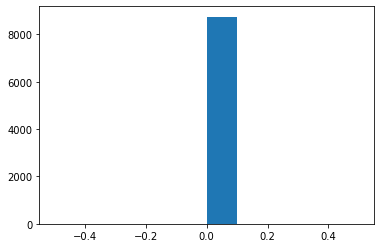

In [2]:
y_new = []
for val in y:
  if(val<10):
    y_new.append(0)
  elif(10 <= val and val <100):
    y_new.append(1)
  elif(100<=val and val<1000):
    y_new.append(2)
  else:
    y_new.append(3)

shuffled['y_new'] = y_new
#print(shuffled.head())
y_encoded = shuffled.loc[:,'y_new']
y_new = np.array(y_new)
plt.hist(y_new)
plt.show()
X_modified = X
#X_modified = X.drop(['n/m', '(n/m)^2', '(n/m)^3', 'm/n', '(m/n)^2', '(m/n)^3', 'max', 'av.length'], axis = 1)
#print(X_modified.shape[1])

In [3]:
from imblearn.over_sampling import RandomOverSampler

names = [ 'av.length','max','std.dev', 'n', 'm']
X_modified = X.drop([ 'k', 'n/m', 'median', 'range',   'min','indeks', 'class',  'subtype', '(m/n)^3', '(m/n)^2', '(n/m)^2', '(n/m)^3','m/n'], axis = 1)
#_modified['n/m'] = X_modified['n/m']
print(X_modified.head())

oversample = RandomOverSampler(random_state=0)
#oversample.fit(X_modified, y_encoded)
X_modified, y = oversample.fit_resample(X_modified, y)

     n   m   av.length    std.dev  max
0  180  36   97.027779  45.132622  203
1   80  32  100.300003  21.576712  150
2   36   4  106.666664  43.838013  209
3   36   4  101.694443  19.487461  155
4   40  20   65.550003  22.500086  100


In [4]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

l_encode = LabelEncoder()
l_encode.fit(y_encoded)
y_encoded = l_encode.transform(y_encoded)
y_encoded = to_categorical(y_encoded)
y_encoded

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [5]:
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

#X = pd.DataFrame(X, columns=names)
#print(X.head())

from sklearn.decomposition import PCA

#,'PC2','PC3','PC4','PC5','PC6','PC7','PC8
#pca = PCA(n_components=9)
#pca.fit(X)
#X = pca.transform(X)
#X = pd.DataFrame(X,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])


#from scipy import stats
#df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

X_train, X_test, y_train, y_test = train_test_split(X_modified, y, random_state=0, train_size = 0.83)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=0, train_size = 0.83)
print(X_train.shape[1])
print(X_val.shape[0])
print(X_test.shape[0])

X_train = sc.fit_transform(X_train)
X_test_copy = X_test
X_test = sc.transform(X_test)
X_val_copy = X_val
X_val = sc.transform(X_val)


5
2070
2494


In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

classifier = Sequential()
classifier.add(Dense(4, input_dim = X_modified.shape[1], activation='relu'))
#classifier.add(Dense(8, activation = 'relu'))

classifier.add(Dense(8, activation = 'relu'))

#classifier.add(Dense(32, activation = 'relu'))
#classifier.add(Dense(32, activation = 'relu'))
#classifier.add(Dense(16, activation = 'relu'))

classifier.add(Dense(32, activation='relu'))
classifier.add(Dropout(0.5))

classifier.add(Dense(8, activation='relu'))

#classifier.add(Dense(8, activation='relu'))


classifier.add(Dense(4, activation='relu'))

classifier.add(Dense(1, activation = 'sigmoid'))
classifier.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['binary_accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 24        
                                                                 
 dense_1 (Dense)             (None, 8)                 40        
                                                                 
 dense_2 (Dense)             (None, 32)                288       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 8)                 264       
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 1)                 5

In [7]:
#classifier.fit(X_train, y_train, batch_size = 64, epochs = 20, verbose = 1)
#scores = classifier.evaluate(X_test, y_test)
#for i, m in enumerate(classifier.metrics_names):
#    print("\n%s: %.3f"% (m, scores[i]))
#print(X_test_copy.iloc[0]['subtype'])

Epoch 1/600
405/405 [==============================] - 4s 6ms/step - loss: 0.3647 - binary_accuracy: 0.8672 - val_loss: 0.1447 - val_binary_accuracy: 0.9570
Epoch 2/600
405/405 [==============================] - 2s 5ms/step - loss: 0.1740 - binary_accuracy: 0.9447 - val_loss: 0.1289 - val_binary_accuracy: 0.9580
Epoch 3/600
405/405 [==============================] - 2s 5ms/step - loss: 0.1619 - binary_accuracy: 0.9519 - val_loss: 0.1215 - val_binary_accuracy: 0.9604
Epoch 4/600
405/405 [==============================] - 2s 5ms/step - loss: 0.1548 - binary_accuracy: 0.9530 - val_loss: 0.1195 - val_binary_accuracy: 0.9628
Epoch 5/600
405/405 [==============================] - 3s 6ms/step - loss: 0.1507 - binary_accuracy: 0.9539 - val_loss: 0.1158 - val_binary_accuracy: 0.9633
Epoch 6/600
405/405 [==============================] - 2s 5ms/step - loss: 0.1467 - binary_accuracy: 0.9564 - val_loss: 0.1164 - val_binary_accuracy: 0.9662
Epoch 7/600
405/405 [==============================] - 2s 

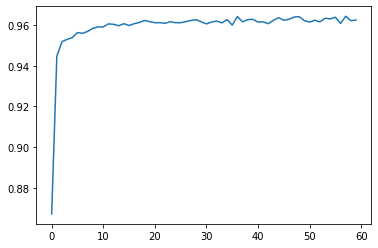

In [8]:
from keras.metrics import accuracy
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 25, 
                                        restore_best_weights = True)
  
history = classifier.fit(X_train, y_train, batch_size = 25, 
                    epochs = 600, validation_data =(X_val, y_val), 
                    callbacks =[earlystopping])
plt.plot(history.history['binary_accuracy'])



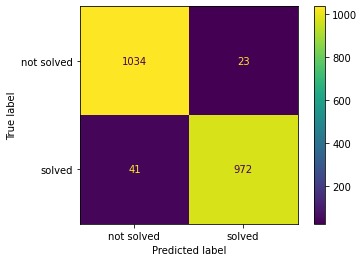

In [9]:
from keras.metrics import accuracy
#test_size = X_test.shape[0]
pred = classifier.predict(X_val)
for i in range(len(pred)):
  #print(pred[i])
  if(pred[i][0]>0.5):
    pred[i] = 1
  else:
    pred[i]=0
#print(pred)
#pred_ = np.argmax(pred, axis = 1)
#print(pred_)
#pred_ = l_encode.inverse_transform(pred_)
#print(pred_)
#true_y = l_encode.inverse_transform(np.argmax(to_categorical(y_val), axis = 1)[:,1])
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#for i in range(len(pred_)):
#  print(true_y[i])
#print(confusion_matrix(true_y, pred_, labels=[0, 1, 2, 3]))
cm = confusion_matrix(y_val, pred, labels=[0, 1])
cmd = ConfusionMatrixDisplay(cm, display_labels=['not solved', 'solved'])
#plt.subplot(1, 2, 1)
cmd.plot()
#print(f'accuracy: {(cnt_correct/cnt)*100:.2f}%')


In [10]:
from keras.metrics import accuracy
#test_size = X_test.shape[0]
pred = classifier.predict(X_test)
for i in range(len(pred)):
  #print(pred[i])
  if(pred[i][0]>0.5):
    pred[i] = 1
  else:
    pred[i]=0
#print(pred)
pred_ = np.argmax(pred, axis = 1)
#print(pred_)
pred_ = l_encode.inverse_transform(pred_)

#true_y = l_encode.inverse_transform(np.argmax(to_categorical(y_test), axis = 1)[:,1])


#for i,j in zip(pred_, true_y):
#    print("Predicted: {}, True: {}".format(i, j))

cnt = 0
cnt_correct = 0

print("very hard -> easy")
for i in range(len(pred_)):
  cnt += 1
  #if(pred_[i] == true_y[i]):
  #  cnt_correct += 1
 # if(pred_[i] == 0 and true_y[i] == 3):
   # for j in range(len(names)):
  #    print(names[j]+"->"+str(X_test_copy.iloc[i][names[j]]))
 #   print("------------------------------------------------------------------")
  
#print(f'accuracy: {(cnt_correct/cnt)*100:.2f}%')

very hard -> easy


accuracy: 0.00%


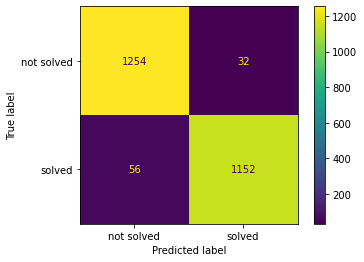

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#for i in range(len(pred_)):
#  print(true_y[i])
#print(confusion_matrix(true_y, pred_, labels=[0, 1, 2, 3]))
cm = confusion_matrix(y_test, pred, labels=[0, 1])
cmd = ConfusionMatrixDisplay(cm, display_labels=['not solved', 'solved'])
#plt.subplot(1, 2, 1)
cmd.plot()
print(f'accuracy: {(cnt_correct/cnt)*100:.2f}%')

IndexError: ignored

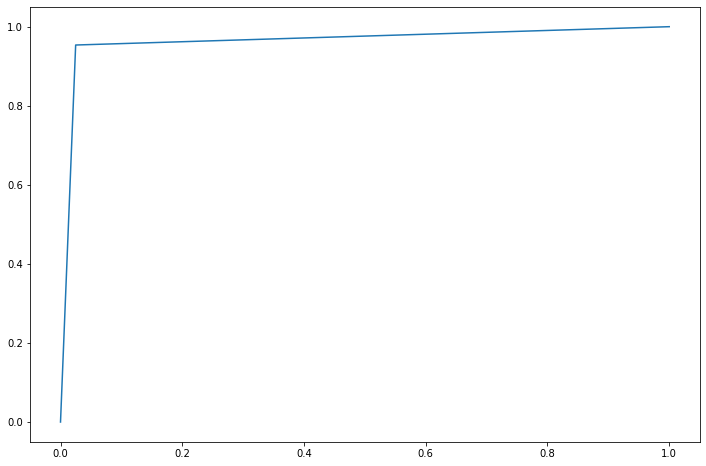

In [12]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


target= ['not solved', 'solved']

fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_test, pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.grid()
plt.show()